# Analyse GDP of India using non-linear Regression

Import CSV file

In [28]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\hp\Documents\Intern\GDP.csv')
df.head()

,Year,Value
0,1960,3.702988e+10
1,1961,3.923244e+10
2,1962,4.216148e+10
3,1963,4.842192e+10
4,1964,5.648029e+10


Importing the necessary libraries

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    60 non-null     int64  
 1   Value   60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


Plotting the Data Set

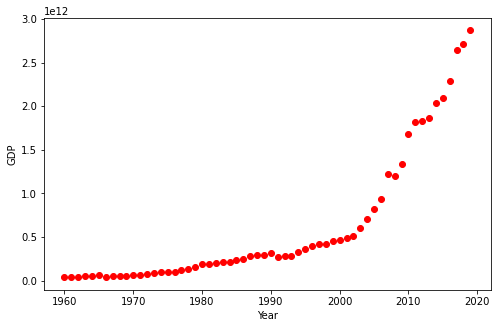

In [31]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Sigmoidal Model:

In [32]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Random sigmoidal function

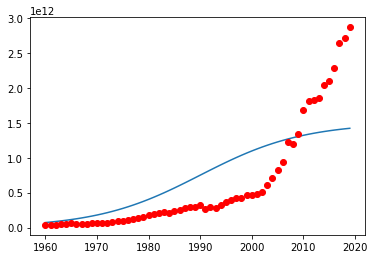

In [33]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*1500000000000.)
plt.plot(x_data, y_data, 'ro')

Normalizing the data

In [35]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [36]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 368.638807, beta_2 = 0.994908


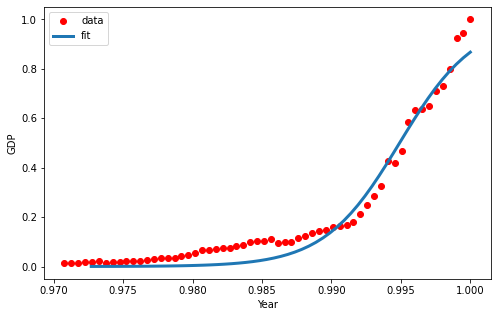

In [37]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Evaluating Machine Learning Model:

In [38]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.97
